In [1]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [ ]:
# Membuat Spark Session untuk mengakses fungsi-fungsi sparkSQL
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

spark

23/12/30 03:44:37 WARN Utils: Your hostname, codespaces-95e949 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
23/12/30 03:44:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/30 03:44:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
mall_df = spark.read.csv('Mall_Customers.csv', header=True, inferSchema=True)
mall_df

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72


In [ ]:
mall_df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



In [ ]:
mall_df.columns

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
mall_df.count

<bound method DataFrame.count of DataFrame[CustomerID: int, Gender: string, Age: int, Annual Income (k$): int, Spending Score (1-100): int]>

In [ ]:
len(mall_df.columns)

5

In [ ]:
mall_df.describe().show()

23/12/30 03:44:46 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID|Gender|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  NULL|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  NULL|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



In [ ]:
mall_df.select('CustomerID','Gender').show()

+----------+------+
|CustomerID|Gender|
+----------+------+
|         1|  Male|
|         2|  Male|
|         3|Female|
|         4|Female|
|         5|Female|
|         6|Female|
|         7|Female|
|         8|Female|
|         9|  Male|
|        10|Female|
|        11|  Male|
|        12|Female|
|        13|Female|
|        14|Female|
|        15|  Male|
|        16|  Male|
|        17|Female|
|        18|  Male|
|        19|  Male|
|        20|Female|
+----------+------+
only showing top 20 rows



In [ ]:
bonus_income = 5
mall_df.withColumn('total_income', mall_df['Annual Income (k$)']+bonus_income).show()

+----------+------+---+------------------+----------------------+------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|total_income|
+----------+------+---+------------------+----------------------+------------+
|         1|  Male| 19|                15|                    39|          20|
|         2|  Male| 21|                15|                    81|          20|
|         3|Female| 20|                16|                     6|          21|
|         4|Female| 23|                16|                    77|          21|
|         5|Female| 31|                17|                    40|          22|
|         6|Female| 22|                17|                    76|          22|
|         7|Female| 35|                18|                     6|          23|
|         8|Female| 23|                18|                    94|          23|
|         9|  Male| 64|                19|                     3|          24|
|        10|Female| 30|                19|          

In [ ]:
mall_df.withColumn('total_income', mall_df['Annual Income (k$)']+bonus_income)
mall_df.show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

In [ ]:
mall_df.withColumnRenamed('total_income', 'Total Income (k$)')
mall_df.show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

In [ ]:
mall_df.filter(mall_df['Age'] > 30).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         5|Female| 31|                17|                    40|
|         7|Female| 35|                18|                     6|
|         9|  Male| 64|                19|                     3|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        13|Female| 58|                20|                    15|
|        15|  Male| 37|                20|                    13|
|        17|Female| 35|                21|                    35|
|        19|  Male| 52|                23|                    29|
|        20|Female| 35|                23|                    98|
|        21|  Male| 35|                24|                    35|
|        23|Female| 46|                25|                     5|
|        2

In [ ]:
mall_df.filter(mall_df['Annual Income (k$)'] > 19).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|        13|Female| 58|                20|                    15|
|        14|Female| 24|                20|                    77|
|        15|  Male| 37|                20|                    13|
|        16|  Male| 22|                20|                    79|
|        17|Female| 35|                21|                    35|
|        18|  Male| 20|                21|                    66|
|        19|  Male| 52|                23|                    29|
|        20|Female| 35|                23|                    98|
|        21|  Male| 35|                24|                    35|
|        22|  Male| 25|                24|                    73|
|        23|Female| 46|                25|                     5|
|        24|  Male| 31|                25|                    73|
|        2

In [ ]:
from pyspark.sql.functions import *

mall_df.select([count (when (isnan (c), c)).alias (c) for c in mall_df.columns]).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         0|     0|  0|                 0|                     0|
+----------+------+---+------------------+----------------------+



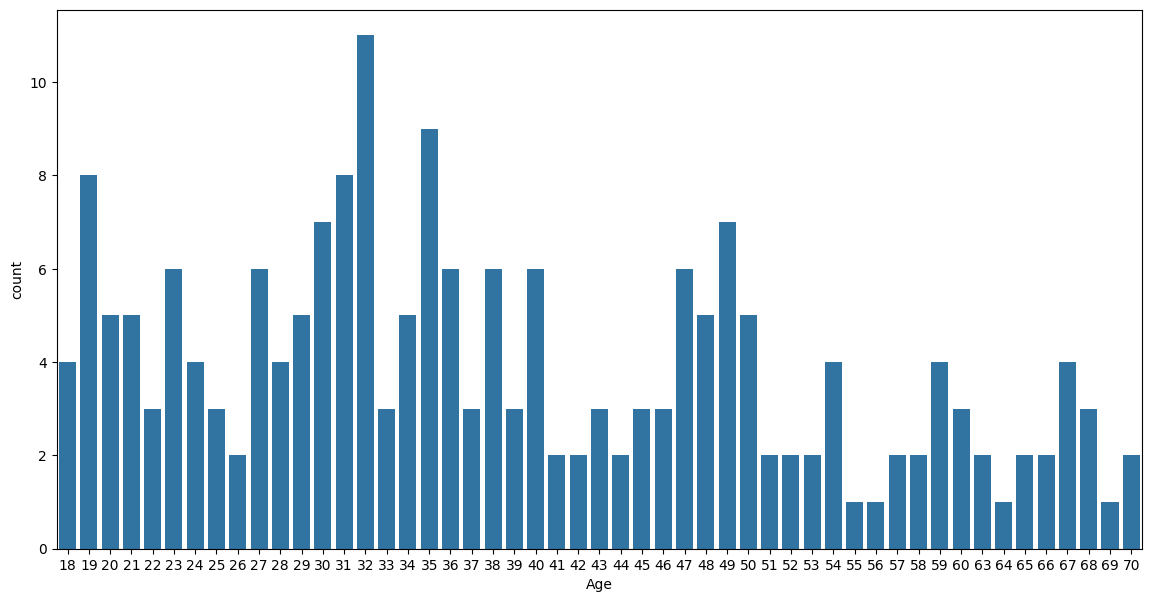

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1, figsize=(14, 7))
sns.countplot(x='Age', data=mall_df.toPandas())
plt.show()

In [ ]:
      # SCRAPPING DATA -- NAMESPACE HERE -- NAMESPACE HERE -- NAMESPACE HERE -- NAMESPACE HERE -- NAMESPACE HERE -- SCRAPPING DATA #

In [ ]:
pip install newspaper3k

23/12/30 03:44:52 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from newspaper import Article
url = "https://travel.detik.com/travel-news/d-7115870/panda-tertua-jepang-sakit-batal-pulang-kampung-ke-china"
article = Article(url, 'id')

article.download()
article.parse()

berita = article.text
print("Berita\n", berita)

Berita
 Panda-panda milik China mulai diminta pulang kampung. Tapi si Tan Tan yang berada di Jepang harus menunda kepulangan satu tahun lagi.

Dilansir dari Japan Today pada Sabtu (30/12), Tan Tan adalah panda tertua Jepang yang berada di kebun binatang Oji di Kobe. Panda ini datang ke kebun binatang tahun 2000 dari Tiongkok dengan tujuan berkembang biak.

Tan Tan berusia 28 tahun, dalam ukuran umur manusia panda ini kira-kira berusia 80 tahunan. Sejak musim gugur, Tan Tan kehilangan nafsu makan dan kurang aktif.

ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT

Tan Tan harusnya dipulangkan pada Juli 2020, namun hal ini tertunda karena pandemi. Panda ini juga mendapat pengobatan penyakit jantung terkait usia.

Setelah berdiskusi dengan Pemerintah Tiongkok, pihak kebun binatang telah memutuskan bahwa mereka perlu menunda pengembalian hewan tersebut. Padahal, harusnya Tan Tan pulang kampung akhir bulan ini.

Kondisi Tan Tan mulai mengkhawatirkan sejak musim semi 2022. Pihak kebun binatang 

In [4]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
wc = WordCloud(max_font_size=1000, max_words=10000, background_color="white")
wc.generate(berita)

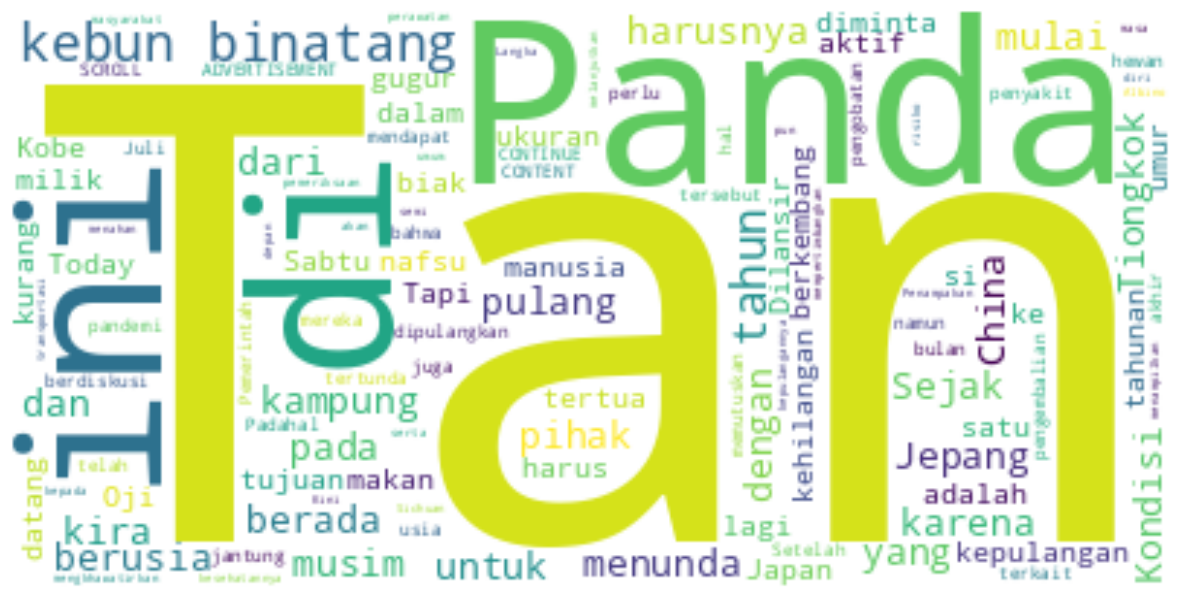

In [6]:
plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()